# Western Power datascience competition Task 0

## Introduction

## Objective

## Visualization of input data

### import python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import sys
import common_functions as cf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.svm import SVR

### Load Dataset

In [2]:
demand_train_set0 = pd.read_csv('Input/demand_train_set0.csv',parse_dates=['datetime'],index_col=['datetime'])
demand_train_set0.head()

,demand_MW
datetime,
2017-11-03 00:00:00,2.19
2017-11-03 00:30:00,2.14
2017-11-03 01:00:00,2.01
2017-11-03 01:30:00,1.87
2017-11-03 02:00:00,1.86


In [3]:
pv_train_set0 = pd.read_csv('Input/pv_train_set0.csv',parse_dates=['datetime'],index_col=['datetime'])
pv_train_set0.head()

,irradiance_Wm-2,pv_power_mw,panel_temp_C
datetime,,,
2017-11-03 00:00:00,0.0,0.0,7.05
2017-11-03 00:30:00,0.0,0.0,7.38
2017-11-03 01:00:00,0.0,0.0,7.70
2017-11-03 01:30:00,0.0,0.0,7.48
2017-11-03 02:00:00,0.0,0.0,7.20


In [4]:
weather_train_set0 = pd.read_csv('Input/weather_train_set0.csv',parse_dates=['datetime'],index_col=['datetime'])
weather_train_set0.head()

,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1
datetime,,,,,,,,,,,,
2015-01-01 00:00:00,8.83,11.22,9.65,7.58,11.62,9.75,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00,8.90,11.32,9.76,7.62,11.65,9.91,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00,9.10,11.30,9.80,7.61,11.65,9.99,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00,9.35,11.25,10.02,8.11,11.70,10.17,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 04:00:00,9.52,11.32,10.13,8.57,11.79,10.40,0.0,0.0,0.0,0.0,0.0,0.0


### Plot head of input data

<function matplotlib.pyplot.show(close=None, block=None)>

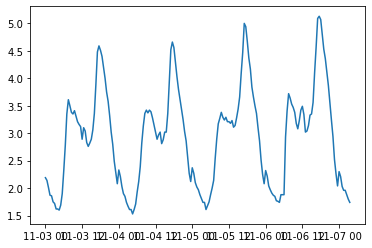

In [11]:
plt.plot(demand_train_set0['demand_MW'][:200])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

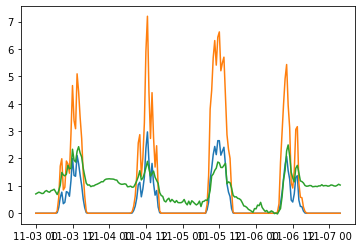

In [12]:
plt.plot(pv_train_set0['pv_power_mw'][:200])
plt.plot(pv_train_set0['irradiance_Wm-2'][:200]/100)
plt.plot(pv_train_set0['panel_temp_C'][:200]/10)
plt.show

### Definition of time parameters

- First day : Friday, November 2017-11-03 -> d = 5
- last day : Sunday, Jully 2018-07-22 -> d = 7
- weeks number : 37 weeks

- d : vector of day (1,2,3,4,5,6,7)
- C : battery charging matrix
- B : matrix of the power used by the battery
- L : power demand matrix
- P : photovoltaic power matrix
- G : grid power matrix
- Cmax: maximum battery charge (6 MWh)
- Bmin : minimum battery power flow
- Bmax : maximum battery power flow

# Continue With Matthieu work

In [5]:
weather_path = 'Input/weather_train_set0.csv'
demand_path = 'Input/demand_train_set0.csv'
solar_path = 'Input/pv_train_set0.csv'
data_preprocessed = cf.DataPreprocesser(weather_path, demand_path, solar_path)
data_preprocessed.load_df()
data_preprocessed.remove_nan()
data_preprocessed.interpolate_df()
print(data_preprocessed.df.head())

                     demand_MW  irradiance_Wm-2  pv_power_mw  panel_temp_C  \
datetime                                                                     
2017-11-03 00:00:00       2.19              0.0          0.0          7.05   
2017-11-03 00:30:00       2.14              0.0          0.0          7.38   
2017-11-03 01:00:00       2.01              0.0          0.0          7.70   
2017-11-03 01:30:00       1.87              0.0          0.0          7.48   
2017-11-03 02:00:00       1.86              0.0          0.0          7.20   

                     temp_location3  temp_location6  temp_location2  \
datetime                                                              
2017-11-03 00:00:00            7.46           13.20           9.640   
2017-11-03 00:30:00            7.30           13.26           9.675   
2017-11-03 01:00:00            7.14           13.32           9.710   
2017-11-03 01:30:00            7.00           13.34           9.720   
2017-11-03 02:00:00        

/home/raph/project/westernpower/westernpower/task0/common_functions.py:37: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=df.index.week


In [6]:
data_preprocessed.set_df(data_preprocessed.df[data_preprocessed.df['week']!=44])
data_preprocessed.df.head()

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp
datetime,,,,,,,,,,,,,,,,,,,,
2017-11-06 00:00:00,2.32,0.0,0.0,1.61,5.14,10.76,6.350,3.58,11.120,7.390,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,1.0
2017-11-06 00:30:00,2.22,0.0,0.0,2.98,5.05,10.70,6.245,3.58,11.060,7.325,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,2.0
2017-11-06 01:00:00,2.04,0.0,0.0,2.76,4.96,10.64,6.140,3.58,11.000,7.260,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,3.0
2017-11-06 01:30:00,1.97,0.0,0.0,3.98,5.03,10.60,6.085,3.57,10.965,7.255,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,4.0
2017-11-06 02:00:00,1.91,0.0,0.0,2.13,5.10,10.56,6.030,3.56,10.930,7.250,0.0,0.0,0.0,0.0,0.0,0.0,45,0,2,5.0


In [9]:
bpd = cf.BatteryPowerDispatcher
discharge, peak_ini, peak_target = bpd.get_ideal_discharge_dispatch(data_preprocessed.df, 45, 0)

In [10]:
discharge

datetime
2017-11-06 15:30:00    0.17
2017-11-06 16:00:00    0.71
2017-11-06 16:30:00    1.18
2017-11-06 17:00:00    1.70
2017-11-06 17:30:00    1.74
2017-11-06 18:00:00    1.68
2017-11-06 18:30:00    1.41
2017-11-06 19:00:00    1.14
2017-11-06 19:30:00    0.97
2017-11-06 20:00:00    0.73
2017-11-06 20:30:00    0.48
Name: demand_MW, dtype: float64

In [11]:
peak_ini

5.13

In [12]:
peak_target

3.3899999999999837

In [13]:
discharge.sum()/2

5.95500000000009

In [28]:
res = pd.DataFrame(columns = ['peak_ini','peak_target','energy','solar_energy','duration','week','dow'])
dispatch_summary = pd.DataFrame(index= range(32,43))
idx = 0
with tqdm(total=len(df['week'].unique())*7, file=sys.stdout) as pbar:
    for week in df['week'].unique():
        for dow in range(0,7):
            discharge,peak_ini,peak_target = get_ideal_dispatch(df,week,dow)
            energy = discharge.sum()*0.5
            sp = len(discharge[discharge>0])
            dispatch_summary[str(week*10)+str(dow)]=discharge.values
            idx = idx+1

            solar_available = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']<=31),'pv_power_mw'].sum()*0.5
            res.loc[idx,:] = [peak_ini,peak_target,energy,solar_available,sp,week,dow]
            pbar.update()


100%|██████████| 259/259 [00:18<00:00, 14.35it/s]


In [29]:
res.head()

,peak_ini,peak_target,energy,solar_energy,duration,week,dow
1,5.13,3.39,5.955,7.19,11,45,0
2,5.15,3.35,5.955,2.38,10,45,1
3,5.05,3.31,5.96,9.94,10,45,2
4,4.96,3.22,5.99,4.36,11,45,3
5,4.7,3.04,5.97,9.97,11,45,4


In [30]:
res.loc[res['peak_ini']>0,'peak_score'] =(res.loc[res['peak_ini']>0,'peak_ini']-res.loc[res['peak_ini']>0,'peak_target'])/res.loc[res['peak_ini']>0,'peak_ini']*100

res['solar_score'] = (res['solar_energy']/res['energy']*100).apply(lambda x: min(x,100))

res['dispatch'] = res['peak_ini']-res['peak_target']

res['dispatch_duration'] = res['energy']/res['dispatch']

In [31]:
res.head()

,peak_ini,peak_target,energy,solar_energy,duration,week,dow,peak_score,solar_score,dispatch,dispatch_duration
1,5.13,3.39,5.955,7.19,11,45,0,33.918129,100.000000,1.74,3.422414
2,5.15,3.35,5.955,2.38,10,45,1,34.951456,39.966415,1.8,3.308333
3,5.05,3.31,5.96,9.94,10,45,2,34.455446,100.000000,1.74,3.425287
4,4.96,3.22,5.99,4.36,11,45,3,35.080645,72.787980,1.74,3.442529
5,4.7,3.04,5.97,9.97,11,45,4,35.319149,100.000000,1.66,3.596386


### machine learning algo to estimate solar power from weather data

In [10]:
def get_columns_of_group_names(group_names, location_numbers):
    columns_names = []
    for name in group_names:
        for i in location_numbers:
            columns_names.append('{}_location{}'.format(name, i))
    return columns_names

In [10]:
weather_columns = get_columns_of_group_names(['temp', 'solar'], range(1,7))
df[weather_columns].head()

,temp_location1,temp_location2,temp_location3,temp_location4,temp_location5,temp_location6,solar_location1,solar_location2,solar_location3,solar_location4,solar_location5,solar_location6
datetime,,,,,,,,,,,,
2017-11-03 00:00:00,8.560,9.640,7.46,6.680,13.090,13.20,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-03 00:30:00,8.625,9.675,7.30,6.475,13.150,13.26,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-03 01:00:00,8.690,9.710,7.14,6.270,13.210,13.32,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-03 01:30:00,8.715,9.720,7.00,6.090,13.255,13.34,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-03 02:00:00,8.740,9.730,6.86,5.910,13.300,13.36,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.columns


Index(['demand_MW', 'irradiance_Wm-2', 'pv_power_mw', 'panel_temp_C',
       'temp_location3', 'temp_location6', 'temp_location2', 'temp_location4',
       'temp_location5', 'temp_location1', 'solar_location3',
       'solar_location6', 'solar_location2', 'solar_location4',
       'solar_location5', 'solar_location1', 'week', 'dow', 'hour', 'sp'],
      dtype='object')

In [11]:
def get_week_data(df, week_number):
    return df[df['week'] == week_number]

def display_columns(df, columns_names):
    fig, ax = plt.subplots()
    for column_name in columns_names:
        ax.scatter(range(df.shape[0]), df[column_name], label=column_name)
    ax.legend()
    plt.show()

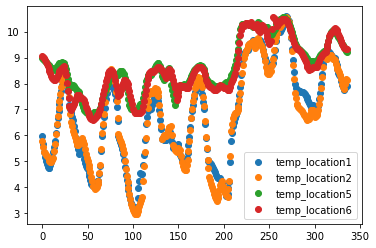

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp
count,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.000000,12432.00000,12432.000000,12432.000000
mean,3.001872,148.863378,0.591725,11.075017,9.053242,10.991273,9.730315,8.865151,11.183896,9.744369,139.359887,148.498361,144.267273,139.610907,148.029022,143.529957,22.243243,3.00000,11.500000,24.500000
std,0.965822,253.822757,1.015109,9.559465,5.642421,3.626204,5.186810,6.539372,3.697345,5.065579,223.532633,234.881552,228.545492,224.270559,234.540204,229.166846,15.690885,2.00008,6.922465,13.853956
min,0.000000,0.000000,0.000000,-6.500000,-5.800000,1.170000,-3.550000,-6.280000,1.110000,-4.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000
25%,2.280000,0.000000,0.000000,5.020000,5.100000,8.590000,6.080000,4.175000,8.780000,6.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.00000,5.750000,12.750000
50%,2.870000,2.240000,0.000000,8.920000,8.230000,10.387500,8.900000,7.865000,10.500000,8.925000,6.010000,6.537500,6.490000,6.160000,6.175000,6.000000,19.000000,3.00000,11.500000,24.500000
75%,3.670000,186.647500,0.740000,14.310000,12.570000,13.430000,12.961250,12.861250,13.520000,12.880000,195.421250,210.985000,204.417500,196.237500,210.910000,199.446250,28.000000,5.00000,17.250000,36.250000
max,6.870000,1159.860000,3.800000,48.140000,24.940000,22.950000,25.930000,27.360000,22.710000,25.450000,934.750000,940.500000,933.750000,928.250000,941.250000,935.750000,52.000000,6.00000,23.000000,48.000000


In [14]:
solar_columns = get_columns_of_group_names(['temp'], [1,2,5,6])
#solar_columns.append('panel_temp_C')
display_columns(get_week_data(df, 10), solar_columns)
df.describe()

In [17]:
temp_columns =  get_columns_of_group_names(['temp','solar'], range(1,7))
temp_columns.append('panel_temp_C')
temp_columns.append('irradiance_Wm-2')
temp_columns.append('pv_power_mw')
df[temp_columns][df['pv_power_mw'] > 0.1].corr()

,temp_location1,temp_location2,temp_location3,temp_location4,temp_location5,temp_location6,solar_location1,solar_location2,solar_location3,solar_location4,solar_location5,solar_location6,panel_temp_C,irradiance_Wm-2,pv_power_mw
temp_location1,1.000000,0.995580,0.994096,0.975634,0.963648,0.957155,0.566668,0.566935,0.569255,0.562390,0.563578,0.572945,0.835317,0.357247,0.377937
temp_location2,0.995580,1.000000,0.990990,0.980097,0.967584,0.965854,0.560336,0.564233,0.564084,0.558422,0.558436,0.570483,0.838180,0.358089,0.379234
temp_location3,0.994096,0.990990,1.000000,0.986235,0.943610,0.939212,0.579281,0.581951,0.587803,0.582249,0.573856,0.585480,0.842151,0.375209,0.397730
temp_location4,0.975634,0.980097,0.986235,1.000000,0.925811,0.924995,0.590144,0.593656,0.598900,0.602604,0.584779,0.597488,0.843298,0.391078,0.416568
temp_location5,0.963648,0.967584,0.943610,0.925811,1.000000,0.996264,0.442590,0.448189,0.448917,0.455121,0.443949,0.459242,0.747255,0.244240,0.256368
temp_location6,0.957155,0.965854,0.939212,0.924995,0.996264,1.000000,0.436884,0.444286,0.443195,0.448852,0.439111,0.456140,0.748571,0.247042,0.259084
solar_location1,0.566668,0.560336,0.579281,0.590144,0.442590,0.436884,1.000000,0.982907,0.974758,0.919175,0.978697,0.962011,0.774416,0.797226,0.807027
solar_location2,0.566935,0.564233,0.581951,0.593656,0.448189,0.444286,0.982907,1.000000,0.978164,0.941066,0.966767,0.977398,0.780244,0.805998,0.814199
solar_location3,0.569255,0.564084,0.587803,0.598900,0.448917,0.443195,0.974758,0.978164,1.000000,0.955155,0.942199,0.944978,0.774841,0.795326,0.803075
solar_location4,0.562390,0.558422,0.582249,0.602604,0.455121,0.448852,0.919175,0.941066,0.955155,1.000000,0.899472,0.919136,0.745768,0.751308,0.759401


In [15]:
def display_correlation_color_map(df, column_names):
    f, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(df[column_names].corr(), annot=True, square=True, cmap = 'coolwarm')
    plt.show()

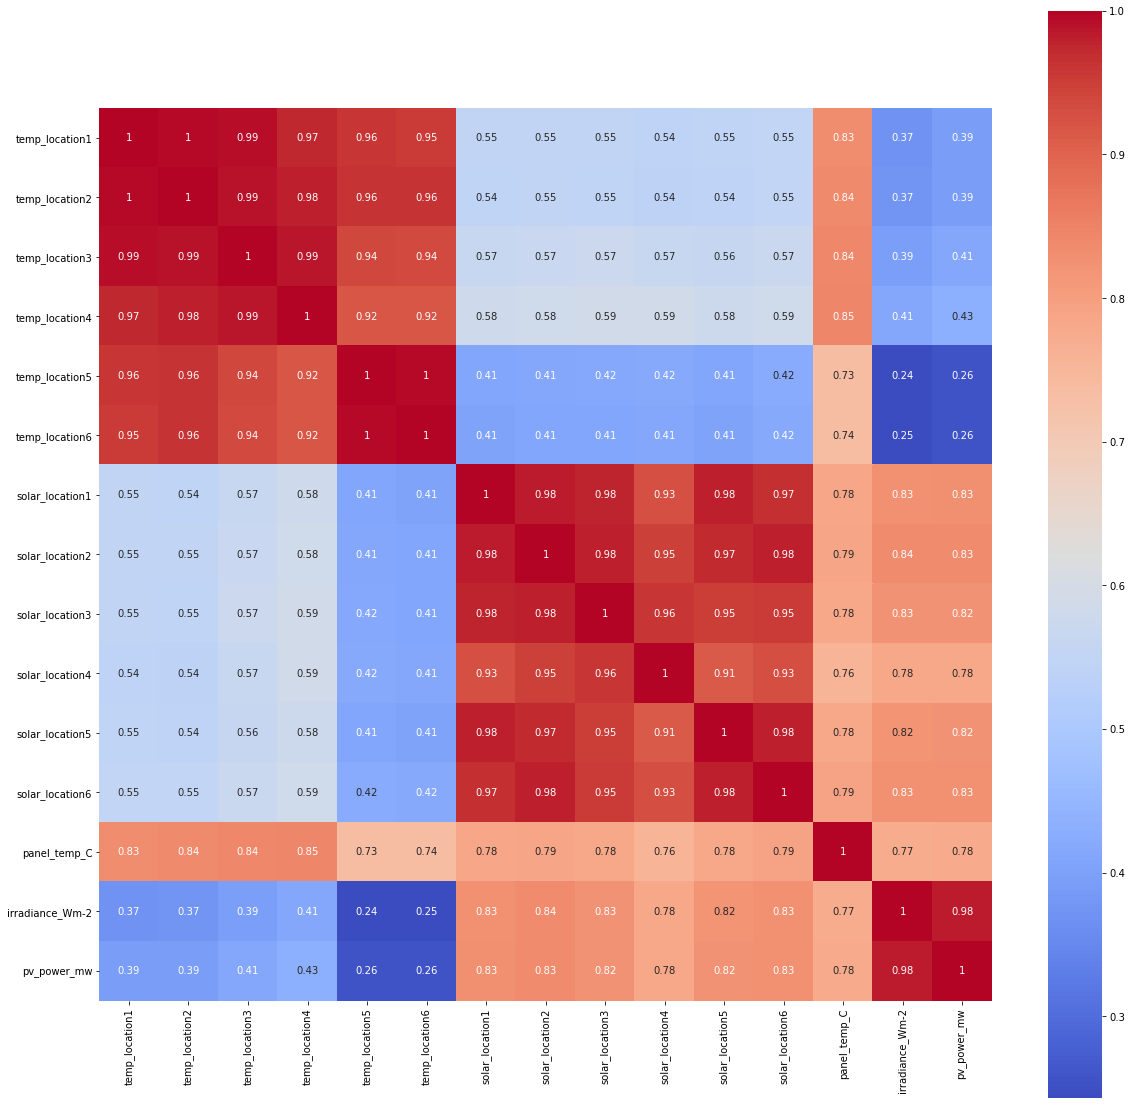

In [19]:
display_correlation_color_map(df[df['solar_location1'] > 10], temp_columns)

/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/raph/anaconda3/envs

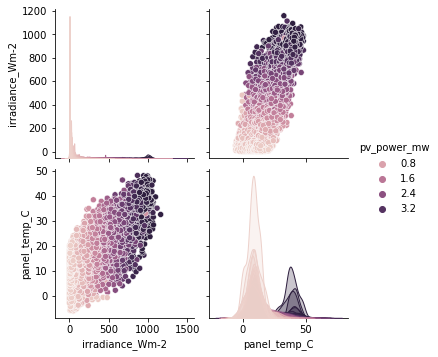

In [110]:
sns.pairplot(data=df[df['pv_power_mw'] > 0.0][['irradiance_Wm-2', 'panel_temp_C', 'pv_power_mw']], hue='pv_power_mw')

In [117]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.svm import SVR

In [118]:
def build_input_for_ml_algo(df, X_column_names, y_column_names):
    X = df[X_column_names].to_numpy()
    y = df[y_column_names].to_numpy()
    return X, y

In [119]:
def predict_with_linear_models_ml_cv(X, y, kf):
    preds = {}
    preds['pred_lin_reg'] = []
    preds['pred_ridge'] = []
    preds['pred_ela_net'] = []
    preds['real_values'] = []
    for train, test in kf.split(X, y):

        lin_reg = LinearRegression().fit(X[train], y[train])
        preds['pred_lin_reg'].append(lin_reg.predict(X[test]))
        ridge = Ridge().fit(X[train], y[train])
        preds['pred_ridge'].append(ridge.predict(X[test]))
        ela_net = ElasticNet().fit(X[train], y[train])
        preds['pred_ela_net'].append(ela_net.predict(X[test]))
        preds['real_values'].append(y[test])
    return preds

In [133]:
kf = KFold(n_splits=5)
X,y = build_input_for_ml_algo(df, ['panel_temp_C', 'irradiance_Wm-2'], ['pv_power_mw'])
preds_solar_power = predict_with_linear_models_ml_cv(X, y, kf)

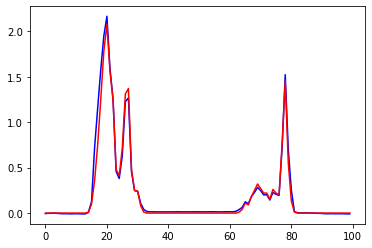

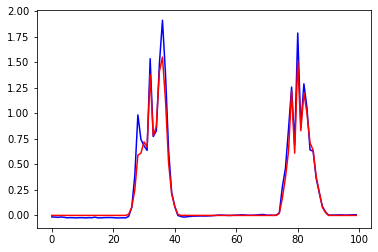

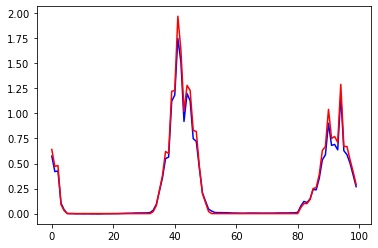

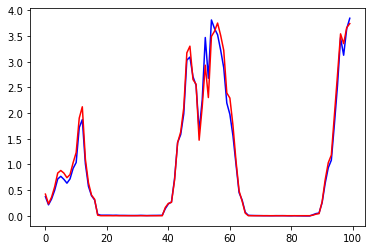

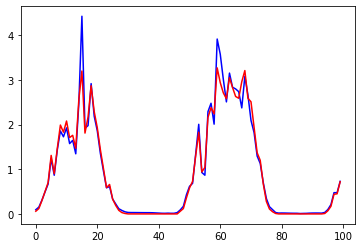

In [134]:
for i in range(5):
    plt.plot(preds_solar_power['pred_lin_reg'][i][:100], color='b')
    plt.plot(preds_solar_power['real_values'][i][:100], color='r')
    plt.show()

In [120]:
def get_best_scores_and_params_of_ml_algos(X, y, models, param_grid):
    search_results = {}
    search_results['best_model'] = None
    search_results['best_scores'] = 0
    search_results['best_parameters'] = None
    for model in models:
        search = GridSearchCV(model, param_grid, cv=5)
        search.fit(X, y)
        if (search.best_score_ > search_results['best_scores']):
            search_results['best_model'] = model
            search_results['best_scores'] = search.best_score_
            search_results['best_parameters'] = search.best_params_
    return search_results

In [121]:
def display_ml_algo_scores(algo_scores):
    fig, ax = plt.subplots(figsize=(14,14))
    for model_name in algo_scores:
        ax.scatter([model_name], [algo_scores[model_name]['best_scores']], label=model_name)
    ax.legend()
    plt.show()

In [42]:
from sklearn.model_selection import train_test_split
X,y = build_input_for_ml_algo(df, ['panel_temp_C', 'irradiance_Wm-2'], ['pv_power_mw'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)
models_bests_scores_and_params = {}
#GradientBoostingRegressor
#KNeighborsRegressor
#SVR
#[Lasso(), Ridge(), ElasticNet()]
#LinearRegression
#BayesianRidge
#RandomForestRegressor

In [55]:
#SVR
param_grid = {'kernel': ['poly', 'rbf']}
print('best kernel for SVR is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid))
param_grid = {'kernel': ['rbf'], 'C': [0.2, 0.4, 0.6, 0.8, 1.0], 'gamma': ['scale', 'auto'], 'epsilon': [0.1,0.05,0.2]}
print('GridSearchCV optimization for SVR :')
models_bests_scores_and_params['SVR'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid)
print(models_bests_scores_and_params['SVR'])

best kernel for SVR is :  {'best_model': SVR(), 'best_scores': 0.9820620177572701, 'best_parameters': {'kernel': 'rbf'}}
GridSearchCV optimization for SVR :
{'best_model': SVR(), 'best_scores': 0.9820620177572701, 'best_parameters': {'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}}


In [57]:
#KNeighborsRegressor
param_grid = {'n_neighbors': np.arange(3,100).tolist()} #, 'algorithm': ['auto', 'ball_tree', 'kd_tree','brute'], 'weights': ['uniform', 'distance']
print('GridSearchCV optimization for KNeighborsRegressor :')
models_bests_scores_and_params['KNeighborsRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[KNeighborsRegressor()], param_grid)
print(models_bests_scores_and_params['KNeighborsRegressor'])

GridSearchCV optimization for KNeighborsRegressor :
{'best_model': KNeighborsRegressor(), 'best_scores': 0.9824115105405271, 'best_parameters': {'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'uniform'}}


In [60]:
#GradientBoostingRegressor
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile']}
print('best loss for GradientBoostingRegressor is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[GradientBoostingRegressor(random_state=42)], param_grid))
param_grid = {'loss': ['huber'], 'n_estimators': [50,100, 150, 200], 'learning_rate': [0.025,0.03,0.04,0.05,0.075,0.1,0.15,0.2,0.5]}
print('GridSearchCV optimization for GradientBoostingRegressor :')
models_bests_scores_and_params['GradientBoostingRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],
                                                                                                     [GradientBoostingRegressor()], param_grid)
print(models_bests_scores_and_params['GradientBoostingRegressor'])

best loss for GradientBoostingRegressor is :  {'best_model': GradientBoostingRegressor(random_state=42), 'best_scores': 0.9826328046180036, 'best_parameters': {'loss': 'huber'}}
GridSearchCV optimization for GradientBoostingRegressor :
{'best_model': GradientBoostingRegressor(), 'best_scores': 0.9827401837995888, 'best_parameters': {'learning_rate': 0.075, 'loss': 'huber', 'n_estimators': 100}}


In [61]:
#[Lasso(), Ridge(), ElasticNet()]
param_grid = {'alpha': np.round(np.arange(0.1,1.1, 0.1), decimals=1).tolist()}
print('GridSearchCV optimization for Lasso, Ridge and ElasticNet :')
models_bests_scores_and_params['Lasso, Ridge, ElasticNet'] = get_best_scores_and_params_of_ml_algos(
    X_train,y_train[:,0], [Lasso(), Ridge(), ElasticNet()], param_grid)
print(models_bests_scores_and_params['Lasso, Ridge, ElasticNet'])

GridSearchCV optimization for Lasso, Ridge and ElasticNet :
{'best_model': Ridge(), 'best_scores': 0.9801754752338816, 'best_parameters': {'alpha': 1.0}}


In [69]:
#RandomForestRegressor
param_grid = {'n_estimators': np.arange(50, 500, 50).tolist()}
print('GridSearchCV optimization for RandomForestRegressor :')
models_bests_scores_and_params['RandomForestRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0], [RandomForestRegressor(random_state=42)], param_grid)
print(models_bests_scores_and_params['RandomForestRegressor'])

GridSearchCV optimization for RandomForestRegressor :
{'best_model': RandomForestRegressor(random_state=42), 'best_scores': 0.9799848579808106, 'best_parameters': {'n_estimators': 350}}


{'SVR': {'best_model': SVR(), 'best_scores': 0.9820620177572701, 'best_parameters': {'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}}, 'KNeighborsRegressor': {'best_model': KNeighborsRegressor(), 'best_scores': 0.9824115105405271, 'best_parameters': {'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'uniform'}}, 'GradientBoostingRegressor': {'best_model': GradientBoostingRegressor(), 'best_scores': 0.9827401837995888, 'best_parameters': {'learning_rate': 0.075, 'loss': 'huber', 'n_estimators': 100}}, 'Lasso, Ridge, ElasticNet': {'best_model': Ridge(), 'best_scores': 0.9801754752338816, 'best_parameters': {'alpha': 1.0}}, 'RandomForestRegressor': {'best_model': RandomForestRegressor(random_state=42), 'best_scores': 0.9799848579808106, 'best_parameters': {'n_estimators': 350}}}


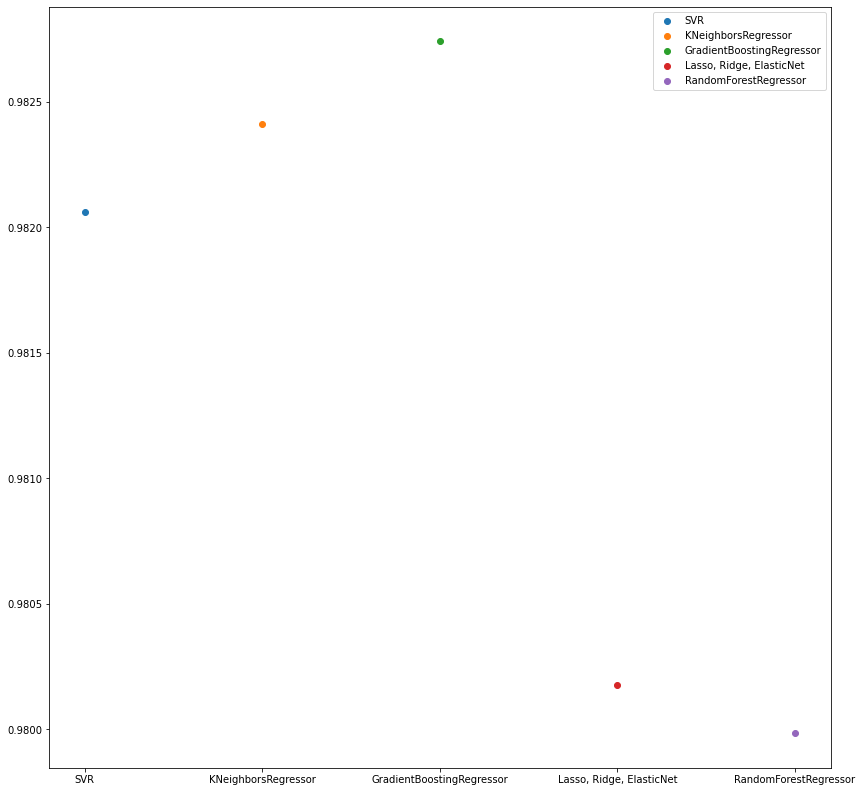

In [70]:
display_ml_algo_scores(models_bests_scores_and_params)

In [123]:
def model_fit_score_and_predict(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test), model.predict(X_train)

In [73]:
models_bests_scores_and_params

{'SVR': {'best_model': SVR(),
  'best_scores': 0.9820620177572701,
  'best_parameters': {'C': 1.0,
   'epsilon': 0.1,
   'gamma': 'scale',
   'kernel': 'rbf'}},
 'KNeighborsRegressor': {'best_model': KNeighborsRegressor(),
  'best_scores': 0.9824115105405271,
  'best_parameters': {'algorithm': 'auto',
   'n_neighbors': 30,
   'weights': 'uniform'}},
 'GradientBoostingRegressor': {'best_model': GradientBoostingRegressor(),
  'best_scores': 0.9827401837995888,
  'best_parameters': {'learning_rate': 0.075,
   'loss': 'huber',
   'n_estimators': 100}},
 'Lasso, Ridge, ElasticNet': {'best_model': Ridge(),
  'best_scores': 0.9801754752338816,
  'best_parameters': {'alpha': 1.0}},
 'RandomForestRegressor': {'best_model': RandomForestRegressor(random_state=42),
  'best_scores': 0.9799848579808106,
  'best_parameters': {'n_estimators': 350}}}

In [76]:
final_scores = {}
final_predictions = {}
final_scores['SVR'], final_predictions['SVR'] = model_fit_score_and_predict(X_train, y_train[:,0], X_test, y_test[:,0], SVR(kernel='rbf', gamma='scale'))
final_scores['KNeighborsRegressor'], final_predictions['KNeighborsRegressor'] = model_fit_score_and_predict(
    X_train, y_train[:,0], X_test, y_test[:,0], KNeighborsRegressor(algorithm='auto', n_neighbors=30, weights='uniform'))
final_scores['GradientBoostingRegressor'], final_predictions['GradientBoostingRegressor'] = model_fit_score_and_predict(
    X_train, y_train[:,0], X_test, y_test[:,0], GradientBoostingRegressor(learning_rate=0.075, loss='huber', n_estimators=100, random_state=42))

In [19]:
def display_ml_algo_final_scores(scores):
    fig, ax = plt.subplots(figsize=(10,10))
    for model_name in scores:
        ax.scatter([model_name], [scores[model_name]], label=model_name)
    ax.legend()
    plt.show()

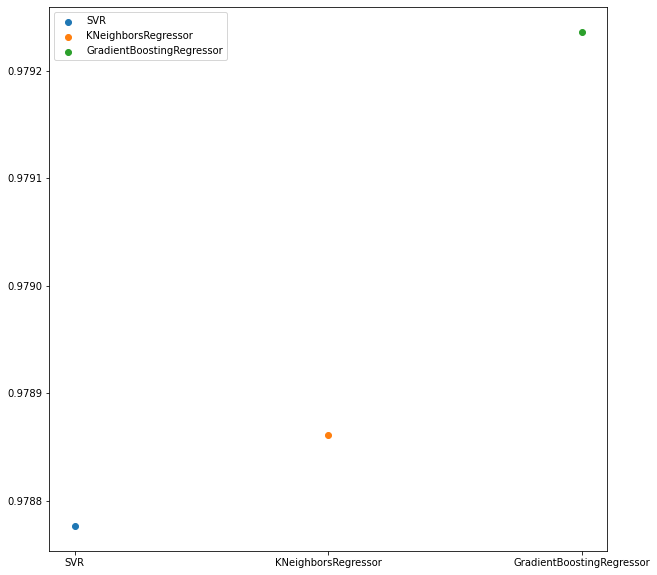

In [82]:
display_ml_algo_final_scores(final_scores)

## Solar data from weather data

### solar temp

In [24]:
from sklearn.model_selection import train_test_split
weather_columns = get_columns_of_group_names(['temp', 'solar'], [1,2])
X,y = build_input_for_ml_algo(df[df['solar_location1'] > 0], weather_columns, ['panel_temp_C'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)
models_bests_scores_and_params = {}
#GradientBoostingRegressor
#KNeighborsRegressor
#SVR
#[Lasso(), Ridge(), ElasticNet()]
#LinearRegression
#BayesianRidge
#RandomForestRegressor

In [25]:
#SVR
param_grid = {'kernel': ['poly', 'rbf']}
print('best kernel for SVR is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid))
param_grid = {'kernel': ['rbf'], 'C': [0.2, 0.4, 0.6, 0.8, 1.0], 'gamma': ['scale', 'auto'], 'epsilon': [0.1,0.05,0.2]}
print('GridSearchCV optimization for SVR :')
models_bests_scores_and_params['SVR'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid)
print(models_bests_scores_and_params['SVR'])

best kernel for SVR is :  {'best_model': SVR(), 'best_scores': 0.685423655429548, 'best_parameters': {'kernel': 'rbf'}}
GridSearchCV optimization for SVR :
{'best_model': SVR(), 'best_scores': 0.6854764848693702, 'best_parameters': {'C': 1.0, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'rbf'}}


In [26]:
#KNeighborsRegressor
param_grid = {'n_neighbors': np.arange(3,100).tolist()} #, 'algorithm': ['auto', 'ball_tree', 'kd_tree','brute'], 'weights': ['uniform', 'distance']
print('GridSearchCV optimization for KNeighborsRegressor :')
models_bests_scores_and_params['KNeighborsRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[KNeighborsRegressor()], param_grid)
print(models_bests_scores_and_params['KNeighborsRegressor'])

GridSearchCV optimization for KNeighborsRegressor :
{'best_model': KNeighborsRegressor(), 'best_scores': 0.8020268999180861, 'best_parameters': {'n_neighbors': 7}}


In [28]:
#GradientBoostingRegressor
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile']}
print('best loss for GradientBoostingRegressor is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[GradientBoostingRegressor(random_state=42)], param_grid))
param_grid = {'loss': ['ls'], 'n_estimators': [50,100, 150, 200], 'learning_rate': [0.025,0.03,0.04,0.05,0.075,0.1,0.15,0.2,0.5]}
print('GridSearchCV optimization for GradientBoostingRegressor :')
models_bests_scores_and_params['GradientBoostingRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],
                                                                                                     [GradientBoostingRegressor()], param_grid)
print(models_bests_scores_and_params['GradientBoostingRegressor'])

best loss for GradientBoostingRegressor is :  {'best_model': GradientBoostingRegressor(random_state=42), 'best_scores': 0.8789044908432725, 'best_parameters': {'loss': 'ls'}}
GridSearchCV optimization for GradientBoostingRegressor :
{'best_model': GradientBoostingRegressor(), 'best_scores': 0.8809110675724672, 'best_parameters': {'learning_rate': 0.075, 'loss': 'ls', 'n_estimators': 200}}


In [29]:
#[Lasso(), Ridge(), ElasticNet()]
param_grid = {'alpha': np.round(np.arange(0.1,1.1, 0.1), decimals=1).tolist()}
print('GridSearchCV optimization for Lasso, Ridge and ElasticNet :')
models_bests_scores_and_params['Lasso, Ridge, ElasticNet'] = get_best_scores_and_params_of_ml_algos(
    X_train,y_train[:,0], [Lasso(), Ridge(), ElasticNet()], param_grid)
print(models_bests_scores_and_params['Lasso, Ridge, ElasticNet'])

GridSearchCV optimization for Lasso, Ridge and ElasticNet :
{'best_model': Ridge(), 'best_scores': 0.8710944150522092, 'best_parameters': {'alpha': 1.0}}


In [30]:
#RandomForestRegressor
param_grid = {'n_estimators': np.arange(50, 500, 50).tolist()}
print('GridSearchCV optimization for RandomForestRegressor :')
models_bests_scores_and_params['RandomForestRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0], [RandomForestRegressor(random_state=42)], param_grid)
print(models_bests_scores_and_params['RandomForestRegressor'])

GridSearchCV optimization for RandomForestRegressor :
{'best_model': RandomForestRegressor(random_state=42), 'best_scores': 0.8811178146736094, 'best_parameters': {'n_estimators': 400}}


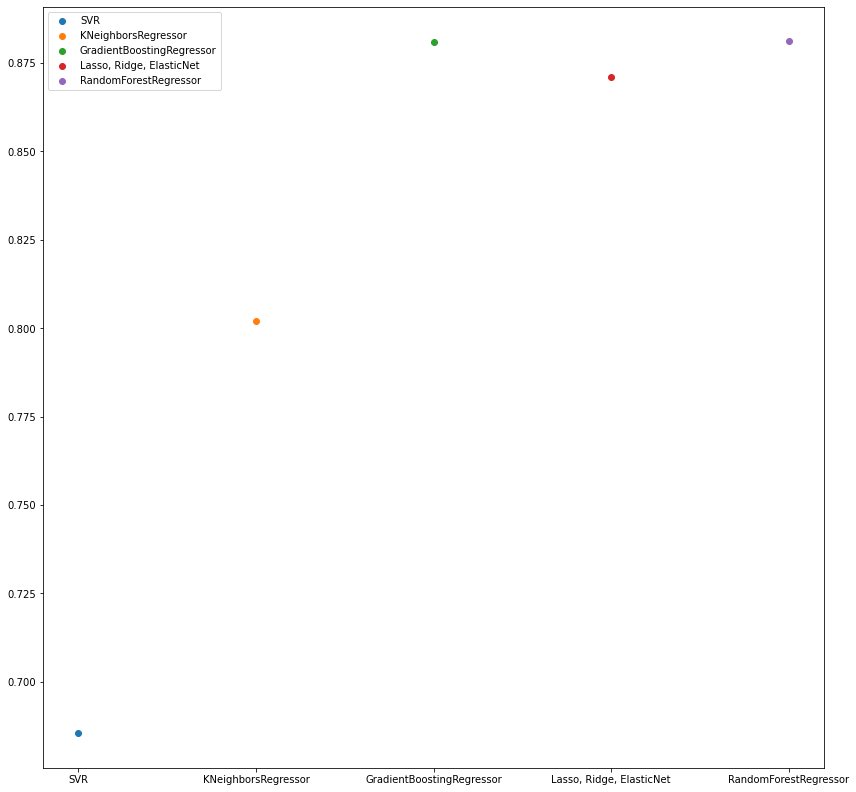

In [31]:
display_ml_algo_scores(models_bests_scores_and_params)

In [32]:
final_scores = {}
final_predictions = {}
final_scores['SVR'], final_predictions['SVR'] = model_fit_score_and_predict(X_train, y_train[:,0], X_test, y_test[:,0], SVR(kernel='rbf', gamma='scale'))
final_scores['KNeighborsRegressor'], final_predictions['KNeighborsRegressor'] = model_fit_score_and_predict(
    X_train, y_train[:,0], X_test, y_test[:,0], KNeighborsRegressor(algorithm='auto', n_neighbors=30, weights='uniform'))
final_scores['GradientBoostingRegressor'], final_predictions['GradientBoostingRegressor'] = model_fit_score_and_predict(
    X_train, y_train[:,0], X_test, y_test[:,0], GradientBoostingRegressor(learning_rate=0.075, loss='huber', n_estimators=100, random_state=42))
final_scores['Ridge'], final_predictions['Ridge'] = model_fit_score_and_predict(
    X_train, y_train[:,0], X_test, y_test[:,0], Ridge(alpha=1))
final_scores['RandomForestRegressor'], final_predictions['RandomForestRegressor'] = model_fit_score_and_predict(
    X_train, y_train[:,0], X_test, y_test[:,0], RandomForestRegressor(n_estimators=400, random_state=42))

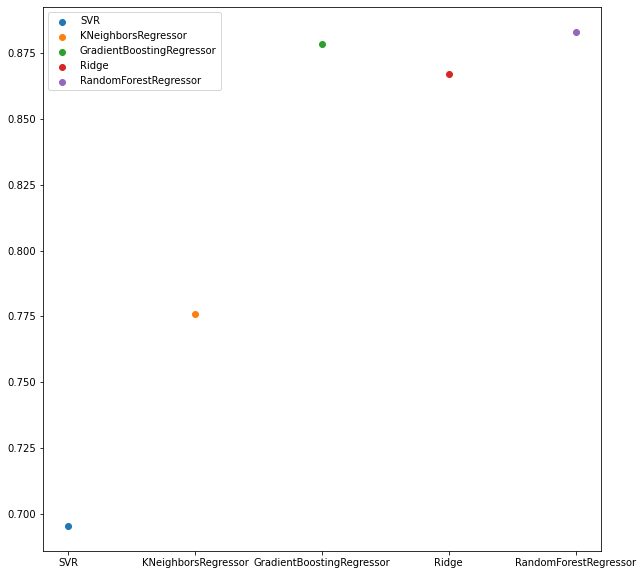

In [33]:
display_ml_algo_final_scores(final_scores)

In [34]:
final_scores

{'SVR': 0.6952204773407055,
 'KNeighborsRegressor': 0.7759897620056067,
 'GradientBoostingRegressor': 0.878445336623581,
 'Ridge': 0.8673523536569121,
 'RandomForestRegressor': 0.8831756453955729}

### solar irradiance

In [47]:
from sklearn.model_selection import train_test_split
weather_columns = get_columns_of_group_names(['temp', 'solar'], [1,2,3,5,6])
X,y = build_input_for_ml_algo(df[df['solar_location1'] > 0], weather_columns, ['irradiance_Wm-2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
models_bests_scores_and_params = {}
#GradientBoostingRegressor
#KNeighborsRegressor
#SVR
#[Lasso(), Ridge(), ElasticNet()]
#LinearRegression
#BayesianRidge
#RandomForestRegressor

In [36]:
df.columns

Index(['demand_MW', 'irradiance_Wm-2', 'pv_power_mw', 'panel_temp_C',
       'temp_location3', 'temp_location6', 'temp_location2', 'temp_location4',
       'temp_location5', 'temp_location1', 'solar_location3',
       'solar_location6', 'solar_location2', 'solar_location4',
       'solar_location5', 'solar_location1', 'week', 'dow', 'hour', 'sp'],
      dtype='object')

In [38]:
#SVR
param_grid = {'kernel': ['poly', 'rbf']}
print('best kernel for SVR is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid))
param_grid = {'kernel': ['rbf'], 'C': [0.2, 0.4, 0.6, 0.8, 1.0], 'gamma': ['scale', 'auto'], 'epsilon': [0.1,0.05,0.2]}
print('GridSearchCV optimization for SVR :')
models_bests_scores_and_params['SVR'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid)
print(models_bests_scores_and_params['SVR'])

best kernel for SVR is :  {'best_model': SVR(), 'best_scores': 0.6718008930130823, 'best_parameters': {'kernel': 'rbf'}}
GridSearchCV optimization for SVR :
{'best_model': SVR(), 'best_scores': 0.6718222936610283, 'best_parameters': {'C': 1.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}}


In [39]:
#KNeighborsRegressor
param_grid = {'n_neighbors': np.arange(3,100).tolist()} #, 'algorithm': ['auto', 'ball_tree', 'kd_tree','brute'], 'weights': ['uniform', 'distance']
print('GridSearchCV optimization for KNeighborsRegressor :')
models_bests_scores_and_params['KNeighborsRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[KNeighborsRegressor()], param_grid)
print(models_bests_scores_and_params['KNeighborsRegressor'])

GridSearchCV optimization for KNeighborsRegressor :
{'best_model': KNeighborsRegressor(), 'best_scores': 0.7443566912578008, 'best_parameters': {'n_neighbors': 29}}


In [48]:
#GradientBoostingRegressor
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile']}
print('best loss for GradientBoostingRegressor is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[GradientBoostingRegressor(random_state=42)], param_grid))
param_grid = {'loss': ['ls'], 'n_estimators': [50,100, 150, 200], 'learning_rate': [0.025,0.03,0.04,0.05,0.075,0.1,0.15,0.2,0.5]}
print('GridSearchCV optimization for GradientBoostingRegressor :')
models_bests_scores_and_params['GradientBoostingRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],
                                                                                                     [GradientBoostingRegressor()], param_grid)
print(models_bests_scores_and_params['GradientBoostingRegressor'])

best loss for GradientBoostingRegressor is :  {'best_model': GradientBoostingRegressor(random_state=42), 'best_scores': 0.7853703539436038, 'best_parameters': {'loss': 'ls'}}
GridSearchCV optimization for GradientBoostingRegressor :
{'best_model': GradientBoostingRegressor(), 'best_scores': 0.7943699494756686, 'best_parameters': {'learning_rate': 0.15, 'loss': 'ls', 'n_estimators': 200}}


In [41]:
#[Lasso(), Ridge(), ElasticNet()]
param_grid = {'alpha': np.round(np.arange(0.1,1.1, 0.1), decimals=1).tolist()}
print('GridSearchCV optimization for Lasso, Ridge and ElasticNet :')
models_bests_scores_and_params['Lasso, Ridge, ElasticNet'] = get_best_scores_and_params_of_ml_algos(
    X_train,y_train[:,0], [Lasso(), Ridge(), ElasticNet()], param_grid)
print(models_bests_scores_and_params['Lasso, Ridge, ElasticNet'])

GridSearchCV optimization for Lasso, Ridge and ElasticNet :


/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48635.405398353934, tolerance: 32435.00564193631
  positive)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53010.526826515794, tolerance: 31267.74911163202
  positive)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38971.62174470723, tolerance: 31813.494666641214
  positive)
/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: Convergence

{'best_model': Ridge(), 'best_scores': 0.7444958706590101, 'best_parameters': {'alpha': 0.1}}


In [46]:
#RandomForestRegressor
param_grid = {'n_estimators': np.arange(50, 500, 50).tolist()}
print('GridSearchCV optimization for RandomForestRegressor :')
models_bests_scores_and_params['RandomForestRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0], [RandomForestRegressor(random_state=42)], param_grid)
print(models_bests_scores_and_params['RandomForestRegressor'])

GridSearchCV optimization for RandomForestRegressor :
{'best_model': RandomForestRegressor(random_state=42), 'best_scores': 0.6829224321900642, 'best_parameters': {'n_estimators': 400}}


In [52]:
#display_ml_algo_scores(models_bests_scores_and_params)
df.columns

Index(['demand_MW', 'irradiance_Wm-2', 'pv_power_mw', 'panel_temp_C',
       'temp_location3', 'temp_location6', 'temp_location2', 'temp_location4',
       'temp_location5', 'temp_location1', 'solar_location3',
       'solar_location6', 'solar_location2', 'solar_location4',
       'solar_location5', 'solar_location1', 'week', 'dow', 'hour', 'sp'],
      dtype='object')

### solar power

In [25]:
weather_columns = data_preprocessed.get_columns_of_group_names(['temp', 'solar'], [1,2])
weather_columns.append('sp')
X,y = data_preprocessed.build_input_for_ml_algo(weather_columns, ['pv_power_mw'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2019)
ml_researcher = cf.MachineLearningResearcher(X_train,y_train)
with tqdm(total=len(ml_researcher.models), file=sys.stdout) as pbar:
    for model_name in ml_researcher.models:
        ml_researcher.get_best_scores_and_params_of_ml_algos(model_name)
        pbar.update()
print(ml_researcher.get_best_model_with_best_score())

100%|██████████| 5/5 [09:03<00:00, 108.77s/it]
{'best_model': RandomForestRegressor(), 'best_scores': 0.849489265178778, 'best_parameters': {'n_estimators': 200}}


In [126]:
weather_columns = get_columns_of_group_names(['temp', 'solar'], [1,2])
weather_columns.append('sp')
X,y = build_input_for_ml_algo(df[df['solar_location1'] > 0], weather_columns, ['pv_power_mw'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
models_bests_scores_and_params = {}
#GradientBoostingRegressor
#KNeighborsRegressor
#SVR
#[Lasso(), Ridge(), ElasticNet()]
#LinearRegression
#BayesianRidge
#RandomForestRegressor

In [ ]:
#SVR
param_grid = {'kernel': ['poly', 'rbf']}
print('best kernel for SVR is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid))
param_grid = {'kernel': ['rbf'], 'C': [0.2, 0.4, 0.6, 0.8, 1.0], 'gamma': ['scale', 'auto'], 'epsilon': [0.1,0.05,0.2]}
print('GridSearchCV optimization for SVR :')
models_bests_scores_and_params['SVR'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[SVR()], param_grid)
print(models_bests_scores_and_params['SVR'])

In [58]:
#KNeighborsRegressor
param_grid = {'n_neighbors': np.arange(3,100).tolist()} #, 'algorithm': ['auto', 'ball_tree', 'kd_tree','brute'], 'weights': ['uniform', 'distance']
print('GridSearchCV optimization for KNeighborsRegressor :')
models_bests_scores_and_params['KNeighborsRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[KNeighborsRegressor()], param_grid)
print(models_bests_scores_and_params['KNeighborsRegressor'])

GridSearchCV optimization for KNeighborsRegressor :
{'best_model': KNeighborsRegressor(), 'best_scores': 0.730205853626789, 'best_parameters': {'n_neighbors': 25}}


In [127]:
#GradientBoostingRegressor
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile']}
print('best loss for GradientBoostingRegressor is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[GradientBoostingRegressor(random_state=42)], param_grid))
param_grid = {'loss': ['ls'], 'n_estimators': [50,100, 150, 200], 'learning_rate': [0.025,0.03,0.04,0.05,0.075,0.1,0.15,0.2,0.5]}
print('GridSearchCV optimization for GradientBoostingRegressor :')
models_bests_scores_and_params['GradientBoostingRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],
                                                                                                     [GradientBoostingRegressor()], param_grid)
print(models_bests_scores_and_params['GradientBoostingRegressor'])

best loss for GradientBoostingRegressor is :  {'best_model': GradientBoostingRegressor(random_state=42), 'best_scores': 0.783105116719415, 'best_parameters': {'loss': 'ls'}}
GridSearchCV optimization for GradientBoostingRegressor :
{'best_model': GradientBoostingRegressor(), 'best_scores': 0.7861514471857305, 'best_parameters': {'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 200}}


In [59]:
#GradientBoostingRegressor
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile']}
print('best loss for GradientBoostingRegressor is : ', get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],[GradientBoostingRegressor(random_state=42)], param_grid))
param_grid = {'loss': ['ls'], 'n_estimators': [50,100, 150, 200], 'learning_rate': [0.025,0.03,0.04,0.05,0.075,0.1,0.15,0.2,0.5]}
print('GridSearchCV optimization for GradientBoostingRegressor :')
models_bests_scores_and_params['GradientBoostingRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0],
                                                                                                     [GradientBoostingRegressor()], param_grid)
print(models_bests_scores_and_params['GradientBoostingRegressor'])

best loss for GradientBoostingRegressor is :  {'best_model': GradientBoostingRegressor(random_state=42), 'best_scores': 0.7696088817857898, 'best_parameters': {'loss': 'ls'}}
GridSearchCV optimization for GradientBoostingRegressor :
{'best_model': GradientBoostingRegressor(), 'best_scores': 0.7719958473498011, 'best_parameters': {'learning_rate': 0.075, 'loss': 'ls', 'n_estimators': 200}}


In [129]:
#RandomForestRegressor
param_grid = {'n_estimators': np.arange(50, 500, 50).tolist()}
print('GridSearchCV optimization for RandomForestRegressor :')
models_bests_scores_and_params['RandomForestRegressor'] = get_best_scores_and_params_of_ml_algos(X_train,y_train[:,0], [RandomForestRegressor(random_state=42)], param_grid)
print(models_bests_scores_and_params['RandomForestRegressor'])

GridSearchCV optimization for RandomForestRegressor :
{'best_model': RandomForestRegressor(random_state=42), 'best_scores': 0.802299345800645, 'best_parameters': {'n_estimators': 450}}


## Comparison of estimations

### Calculation of the proportion of solar energy 

In [61]:
def get_solar_energy_proportion(solar_power):
    return min(solar_power.sum()/2, 6)

In [104]:
def get_solar_energy_proportion_by_day_in_a_week(df,week, qbar=None):
    B = pd.DataFrame(index= range(1,32))
    p_solar = []
    for dow in range(7):
        charge_from_solar, charge_from_grid, B_solar, B_grid = get_charge_of_battery_repartition(df, week, dow)
        B[str(week*10)+str(dow)] = B_solar.values + B_grid.values
        p_solar.append(charge_from_solar/6)
        if qbar != None:
            qbar.update()
    return p_solar, B

In [79]:
def get_charge_of_battery_repartition(df, week, dow):
    solar_power  = df.loc[(df['week']==week)&(df['dow']==dow)&(df['sp']<=31),['pv_power_mw','sp']]
    max_power = 2.5
    max_charge = 6
    max_charge_from_solar = min(solar_power['pv_power_mw'].sum()*0.5, max_charge)
    max_charge_from_grid = max_charge-max_charge_from_solar
    charge_power_from_solar = pd.DataFrame(columns=['power'])
    charge_power_from_grid = pd.DataFrame(columns=['power'])
    charge_from_solar = 0
    charge_from_grid = 0
    for idx in range(31):
        power_from_solar = solar_power['pv_power_mw'].values[idx]
        charge_power_from_solar.loc[idx,:] = min(max_power, power_from_solar, max((max_charge_from_solar - charge_from_solar)*2,0))
        charge_power_from_grid.loc[idx,:] = min(max(max_power - power_from_solar,0), max(max_charge_from_grid - charge_from_grid,0)*2)
        charge_from_solar = charge_power_from_solar['power'].sum()*0.5
        charge_from_grid = charge_power_from_grid['power'].sum()*0.5
    return (charge_from_solar, charge_from_grid, charge_power_from_solar, charge_power_from_grid)

In [90]:
charge_from_solar, charge_from_grid, B_solar, B_grid = get_charge_of_battery_repartition(df, 10, 6)
print(charge_from_solar)
print(charge_from_grid)
print(B_solar)
print(B_grid)
print((B_solar+B_grid).sum()*0.5)

6.0
0.0
   power
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
10   0.0
11   0.0
12   0.0
13  0.01
14  0.09
15  0.26
16  0.24
17  0.36
18  0.45
19   0.4
20  0.33
21  0.34
22  0.75
23  0.81
24  0.44
25  0.53
26   0.7
27  1.01
28   2.5
29   2.5
30  0.28
   power
0      0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
10   0.0
11   0.0
12   0.0
13   0.0
14   0.0
15   0.0
16   0.0
17   0.0
18   0.0
19   0.0
20   0.0
21   0.0
22   0.0
23   0.0
24   0.0
25   0.0
26   0.0
27   0.0
28     0
29     0
30   0.0
power    6.0
dtype: object


In [69]:
get_solar_energy_proportion_by_day_in_a_week(df, 10)

[0.015, 6, 6, 6, 1.525, 6, 6]

In [105]:
with tqdm(total=1, file=sys.stdout) as pbar:
    p_solar, B = get_solar_energy_proportion_by_day_in_a_week(df,10)
    pbar.update()
        

100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


In [106]:
B

,1000,1001,1002,1003,1004,1005,1006
1,2.5,0.0,0.0,0.0,2.5,0.0,0.0
2,2.5,0.0,0.0,0.0,2.5,0.0,0.0
3,2.5,0.0,0.0,0.0,2.5,0.0,0.0
4,2.5,0.0,0.0,0.0,1.45,0.0,0.0
5,1.97,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
df.columns

Index(['demand_MW', 'irradiance_Wm-2', 'pv_power_mw', 'panel_temp_C',
       'temp_location3', 'temp_location6', 'temp_location2', 'temp_location4',
       'temp_location5', 'temp_location1', 'solar_location3',
       'solar_location6', 'solar_location2', 'solar_location4',
       'solar_location5', 'solar_location1', 'week', 'dow', 'hour', 'sp'],
      dtype='object')

In [147]:
demand_prediction = df.loc[df['week'] == 29, ['demand_MW', 'week', 'dow', 'hour', 'sp']]
demand_prediction.index = demand_prediction.index + pd.DateOffset(7)
demand_prediction['week']=demand_prediction.index.week
demand_prediction['dow']=demand_prediction.index.dayofweek
demand_prediction['hour'] = demand_prediction.index.hour
demand_prediction['sp'] = demand_prediction.hour*2 +demand_prediction.index.minute/30 + 1
demand_prediction

/home/raph/anaconda3/envs/westernpower/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


,demand_MW,week,dow,hour,sp
datetime,,,,,
2018-07-23 00:00:00,1.73,30,0,0,1.0
2018-07-23 00:30:00,1.62,30,0,0,2.0
2018-07-23 01:00:00,1.56,30,0,1,3.0
2018-07-23 01:30:00,1.48,30,0,1,4.0
2018-07-23 02:00:00,1.48,30,0,2,5.0
...,...,...,...,...,...
2018-07-29 21:30:00,2.40,30,6,21,44.0
2018-07-29 22:00:00,2.15,30,6,22,45.0
2018-07-29 22:30:00,1.93,30,6,22,46.0


In [152]:
weather_prediction = pd.read_csv('Input/weather_train_set0.csv',parse_dates=['datetime'],index_col=['datetime'])
demand_and_weather_prediction = pd.merge(demand_prediction,weather_prediction, how='outer', left_index=True, right_index=True)
demand_and_weather_prediction = demand_and_weather_prediction.dropna(subset = ['demand_MW']).interpolate()
demand_and_weather_prediction

,demand_MW,week,dow,hour,sp,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1
datetime,,,,,,,,,,,,,,,,,
2018-07-23 00:00:00,1.73,30.0,0.0,0.0,1.0,15.670,18.500,17.050,17.860,18.740,16.740,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 00:30:00,1.62,30.0,0.0,0.0,2.0,15.570,18.355,16.845,17.585,18.630,16.620,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:00:00,1.56,30.0,0.0,1.0,3.0,15.470,18.210,16.640,17.310,18.520,16.500,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 01:30:00,1.48,30.0,0.0,1.0,4.0,15.370,18.110,16.485,17.050,18.455,16.410,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-23 02:00:00,1.48,30.0,0.0,2.0,5.0,15.270,18.010,16.330,16.790,18.390,16.320,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-29 21:30:00,2.40,30.0,6.0,21.0,44.0,15.485,17.415,16.370,16.285,17.625,16.125,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:00:00,2.15,30.0,6.0,22.0,45.0,15.310,17.390,16.300,16.030,17.580,16.040,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-29 22:30:00,1.93,30.0,6.0,22.0,46.0,15.215,17.380,16.255,15.835,17.570,15.980,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
def solar_power_prediction_function(x, model, x_solar):
    if x_solar == 0:
        return 0
    else:
        return model.predict(x)[0]

def predict_solar_power_from_weather(df, model, predicted_df):
    weather_columns = get_columns_of_group_names(['temp', 'solar'], [1,2])
    weather_columns.append('sp')
    X,y = build_input_for_ml_algo(df[df['solar_location1'] > 0], weather_columns, ['pv_power_mw'])
    model.fit(X,y[:,0])
    
    predicted_df['pv_power_mw'] = predicted_df.apply(lambda x: solar_power_prediction_function(np.array([x[weather_columns].to_numpy()]), model, x['solar_location1']), axis=1)
    return predicted_df
    

In [162]:
final_model = RandomForestRegressor(random_state=42, n_estimators = 450)
predicted_df = predict_solar_power_from_weather(df, final_model, demand_and_weather_prediction)

<AxesSubplot:xlabel='datetime'>

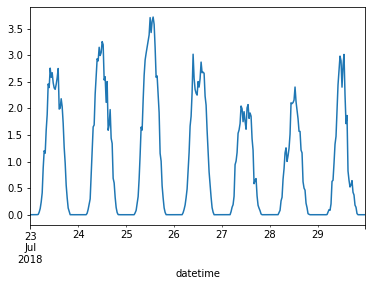

In [164]:
predicted_df['pv_power_mw'].plot()

In [198]:
# prediction of solar power
week_prediction = 30
# Discharge
res = pd.DataFrame(columns = ['peak_ini','peak_target','energy','solar_energy','duration','week','dow'])
dispatch_summary = pd.DataFrame(index= range(32,43))
idx = 0
for dow in range(0,7):
    discharge,peak_ini,peak_target = get_ideal_dispatch(predicted_df,week_prediction,dow)
    energy = discharge.sum()*0.5
    sp = len(discharge[discharge>0])
    dispatch_summary[str(week_prediction*10)+str(dow)]=discharge.values
    idx = idx+1
    solar_available = predicted_df.loc[(predicted_df['week']==week_prediction)&(predicted_df['dow']==dow)&(predicted_df['sp']<=31),'pv_power_mw'].sum()*0.5
    res.loc[idx,:] = [peak_ini,peak_target,energy,solar_available,sp,week_prediction,dow]
# Solar proportion
p_solar, B = get_solar_energy_proportion_by_day_in_a_week(predicted_df,week_prediction)
# power battery end of the day
B_end_of_the_day = pd.DataFrame(index= range(43,49))
for dow in range(0,7):
    B_end_of_the_day[str(week_prediction*10)+str(dow)]=0

In [199]:
B_total = B.append(-dispatch_summary)
B_total = B_total.append(B_end_of_the_day)
B_total

,3000,3001,3002,3003,3004,3005,3006
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.001444,0.000022,0.0,0.0,0.0006,0.000067,0.0
9,0.005178,0.000289,0.000022,0.000711,0.000911,0.001044,0.000022
10,0.048667,0.029267,0.035244,0.037778,0.058467,0.042978,0.002533


In [208]:
final_B = []
for column in B_total.columns.to_list():
    final_B.append(B_total[column])
final_B = pd.concat(final_B, ignore_index=True)
final_B.index = predicted_df.index
final_B = pd.DataFrame(final_B, columns=['charge_MW'])
final_B

,charge_MW
datetime,
2018-07-23 00:00:00,0.0
2018-07-23 00:30:00,0.0
2018-07-23 01:00:00,0.0
2018-07-23 01:30:00,0.0
2018-07-23 02:00:00,0.0
...,...
2018-07-29 21:30:00,0
2018-07-29 22:00:00,0
2018-07-29 22:30:00,0


In [209]:
final_B.to_csv('Output/teamBis.csv')

In [7]:
from scipy.signal import correlate

In [8]:
data_preprocessed.df.head()

,demand_MW,irradiance_Wm-2,pv_power_mw,panel_temp_C,temp_location3,temp_location6,temp_location2,temp_location4,temp_location5,temp_location1,solar_location3,solar_location6,solar_location2,solar_location4,solar_location5,solar_location1,week,dow,hour,sp
datetime,,,,,,,,,,,,,,,,,,,,
2017-11-06 00:00:00,2.32,0.0,0.0,1.61,5.14,10.76,6.350,3.58,11.120,7.390,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,1.0
2017-11-06 00:30:00,2.22,0.0,0.0,2.98,5.05,10.70,6.245,3.58,11.060,7.325,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0,2.0
2017-11-06 01:00:00,2.04,0.0,0.0,2.76,4.96,10.64,6.140,3.58,11.000,7.260,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,3.0
2017-11-06 01:30:00,1.97,0.0,0.0,3.98,5.03,10.60,6.085,3.57,10.965,7.255,0.0,0.0,0.0,0.0,0.0,0.0,45,0,1,4.0
2017-11-06 02:00:00,1.91,0.0,0.0,2.13,5.10,10.56,6.030,3.56,10.930,7.250,0.0,0.0,0.0,0.0,0.0,0.0,45,0,2,5.0


In [34]:
def compute_phaze_shift(x1, x2):
    xcorr = correlate(x1,x2)
    nsamples = x1.size
    dt = np.arange(1-nsamples, nsamples)
    return dt[xcorr.argmax()]

In [50]:
# compute_phaze_shift(x1,x2)
x_data['week'].unique()

array([45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

In [56]:
x_data = data_preprocessed.df[data_preprocessed.df['pv_power_mw'] > 0]
phase_shift = pd.DataFrame(columns=['week', 'dow', 'data_nb', 'phase_shift'])
idx = 0
with tqdm(total=len(x_data['week'].unique())*7 , file=sys.stdout) as pbar:
    for week in x_data['week'].unique():
        for dow in range(7):
            x = x_data[(x_data['week'] == week) & (x_data['dow'] == dow)]
            if x.size > 0:
                
                x1 = x['pv_power_mw'].to_numpy()
                x2 = x['solar_location1'].to_numpy()
#                 phase_shift.append(compute_phaze_shift(x1,x2))
                phase_shift.loc[idx,:] = [week, dow, x1.size, compute_phaze_shift(x1,x2)]
            idx += 1
            pbar.update()


100%|██████████| 259/259 [00:00<00:00, 591.70it/s]


In [42]:
xcorr = correlate(x1,x2)
xcorr

ValueError: a cannot be empty

In [57]:
phase_shift


,week,dow,data_nb,phase_shift
0,45,0,19,-1
1,45,1,19,3
2,45,2,20,0
3,45,3,18,0
4,45,4,18,0
...,...,...,...,...
254,29,2,32,2
255,29,3,32,-1
256,29,4,31,3
257,29,5,30,1


In [33]:
dt[xcorr.argmax()]

0

<AxesSubplot:xlabel='phase_shift', ylabel='Count'>

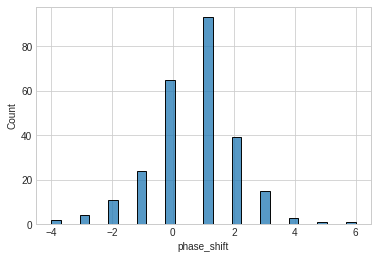

In [69]:
sns.histplot(data=phase_shift, x="phase_shift")